In [1]:
import numpy
print(numpy.__version__)


1.26.4


In [2]:
import soundata

# Inicializace datasetu
dataset = soundata.initialize("urbansound8k")

# Stáhne dataset, pokud ještě není
print("📦 Kontroluji dataset...")
dataset.download()  # Může chvíli trvat (~6 GB)

# Načte metadata
dataset.validate()
clip_ids = dataset.clip_ids

print(f"🔍 V databázi je {len(clip_ids)} klipů.")

INFO: Downloading ['all', 'index']. Index is being stored in /home/cigi/soundenv/lib/python3.10/site-packages/soundata/datasets/indexes, and the rest of files in /home/cigi/sound_datasets/urbansound8k
INFO: [all] downloading UrbanSound8K.tar.gz
INFO: /home/cigi/sound_datasets/urbansound8k/UrbanSound8K.tar.gz already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.


📦 Kontroluji dataset...


INFO: /home/cigi/sound_datasets/urbansound8k/UrbanSound8K_README.txt already exists. Run with force_overwrite=True to download from scratch
INFO: /home/cigi/sound_datasets/urbansound8k/audio already exists. Run with force_overwrite=True to download from scratch
INFO: /home/cigi/sound_datasets/urbansound8k/FREESOUNDCREDITS.txt already exists. Run with force_overwrite=True to download from scratch
INFO: /home/cigi/sound_datasets/urbansound8k/metadata already exists. Run with force_overwrite=True to download from scratch
INFO: [index] downloading urbansound8k_index_1.0.json
INFO: /home/cigi/soundenv/lib/python3.10/site-packages/soundata/datasets/indexes/urbansound8k_index_1.0.json already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.
100%|██████████| 8732/8732 [00:13<00:00, 625.27it/s] 
INFO: Success: the dataset is complete and all files are valid.
INFO: --------------------


🔍 V databázi je 8732 klipů.


In [3]:
# Vybereme všechny klipy
gunshots = []
for clip_id in dataset.clip_ids:
    clip = dataset.clip(clip_id)
    if clip.tags and "gun_shot" in clip.tags.labels:
        gunshots.append(clip)


print(f"💥 Nalezeno {len(gunshots)} klipů se štítkem 'gun_shot'.")

💥 Nalezeno 374 klipů se štítkem 'gun_shot'.


INFO: generated new fontManager



🔫 Gunshot 1
 - ID: 46654-6-0-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/46654-6-0-0.wav
 - Délka: 1.14 s


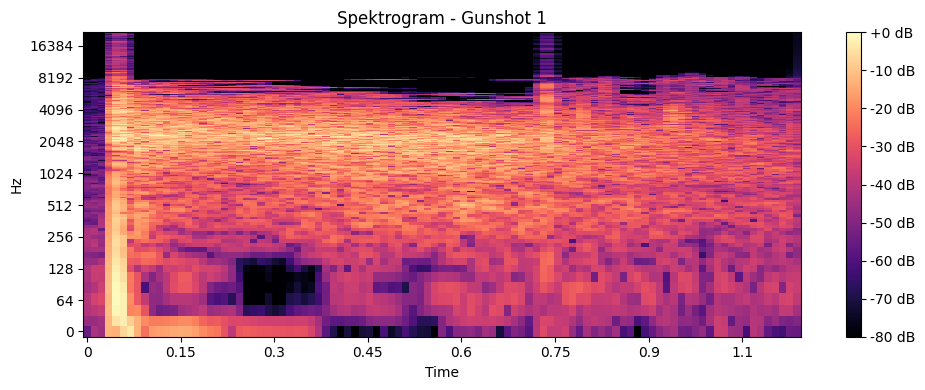


🔫 Gunshot 2
 - ID: 197318-6-1-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-1-0.wav
 - Délka: 1.81 s


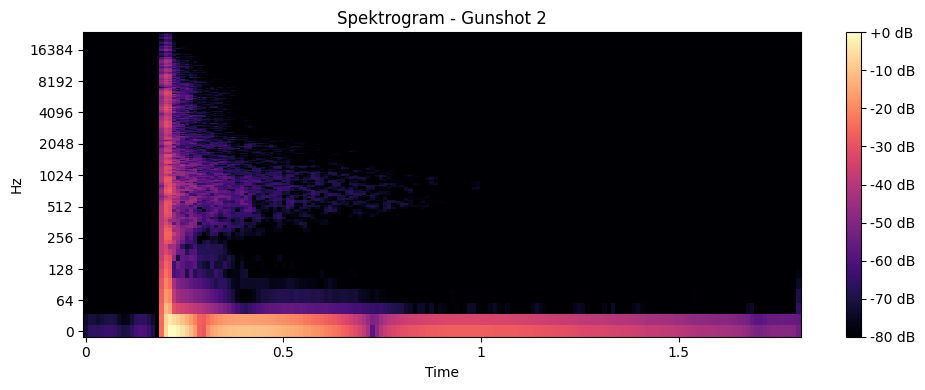


🔫 Gunshot 3
 - ID: 197318-6-3-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-3-0.wav
 - Délka: 1.96 s


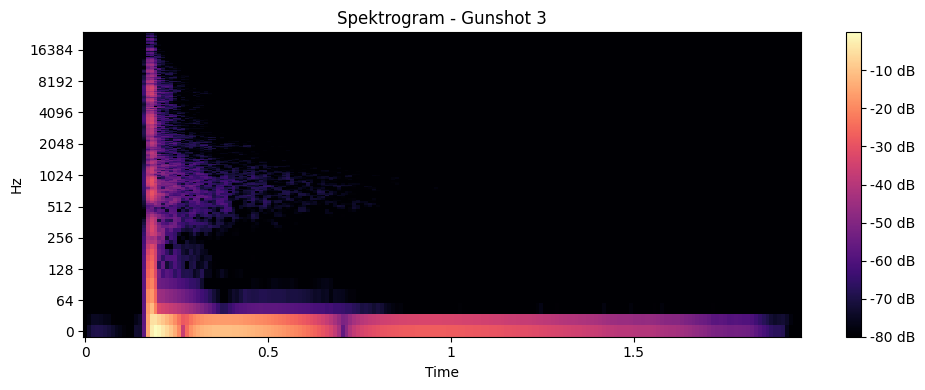

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Ukázka pro první 3 klipy
for i, clip in enumerate(gunshots[:3]):
    print(f"\n🔫 Gunshot {i+1}")
    print(f" - ID: {clip.clip_id}")
    print(f" - Cesta: {clip.audio_path}")
    
    # Načtení zvukového signálu
    y, sr = librosa.load(clip.audio_path, sr=None)
    duration = len(y) / sr
    print(f" - Délka: {duration:.2f} s")

    # Vykreslení spektrogramu
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spektrogram - Gunshot {i+1}')
    plt.tight_layout()
    plt.show()

In [5]:
from IPython.display import Audio

# Přehrání zvukového klipu

# Načteme první gunshot jako NumPy pole
clip = gunshots[0]
y, sr = librosa.load(clip.audio_path, sr=None)

# Přehrát zvuk přímo v notebooku
Audio(y, rate=sr)

In [7]:
#vice klipů

for i, clip in enumerate(gunshots[:20]):
    print(f"\n🔫 Gunshot {i+1}")
    print(f" - ID: {clip.clip_id}")
    print(f" - Cesta: {clip.audio_path}")
    
    y, sr = librosa.load(clip.audio_path, sr=None)
    display(Audio(y, rate=sr))


🔫 Gunshot 1
 - ID: 46654-6-0-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/46654-6-0-0.wav



🔫 Gunshot 2
 - ID: 197318-6-1-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-1-0.wav



🔫 Gunshot 3
 - ID: 197318-6-3-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-3-0.wav



🔫 Gunshot 4
 - ID: 197318-6-7-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-7-0.wav



🔫 Gunshot 5
 - ID: 174294-6-0-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/174294-6-0-0.wav



🔫 Gunshot 6
 - ID: 174294-6-2-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/174294-6-2-0.wav



🔫 Gunshot 7
 - ID: 197318-6-5-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-5-0.wav



🔫 Gunshot 8
 - ID: 86278-6-0-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/86278-6-0-0.wav



🔫 Gunshot 9
 - ID: 197318-6-11-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-11-0.wav



🔫 Gunshot 10
 - ID: 197318-6-2-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-2-0.wav



🔫 Gunshot 11
 - ID: 102305-6-0-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/102305-6-0-0.wav



🔫 Gunshot 12
 - ID: 7061-6-0-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/7061-6-0-0.wav



🔫 Gunshot 13
 - ID: 197318-6-0-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-0-0.wav



🔫 Gunshot 14
 - ID: 197318-6-4-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-4-0.wav



🔫 Gunshot 15
 - ID: 197318-6-10-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-10-0.wav



🔫 Gunshot 16
 - ID: 197318-6-12-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-12-0.wav



🔫 Gunshot 17
 - ID: 197318-6-6-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/197318-6-6-0.wav



🔫 Gunshot 18
 - ID: 174294-6-1-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/174294-6-1-0.wav



🔫 Gunshot 19
 - ID: 46656-6-0-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/46656-6-0-0.wav



🔫 Gunshot 20
 - ID: 174290-6-0-0
 - Cesta: /home/cigi/sound_datasets/urbansound8k/audio/fold1/174290-6-0-0.wav
